In [1]:
from scipy import ndimage
import pandas as pd
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
x1 = genfromtxt('data_magV_1.5.csv', delimiter=',')
x2 = genfromtxt('data_magV_1.6.csv', delimiter=',')
x3 = genfromtxt('data_magV_1.7.csv', delimiter=',')
x4 = genfromtxt('data_magV_1.8.csv', delimiter=',')
x5 = genfromtxt('data_magV_1.9.csv', delimiter=',')
x6 = genfromtxt('data_magV_2.1.csv', delimiter=',')
x7 = genfromtxt('data_magV_2.2.csv', delimiter=',')
x8 = genfromtxt('data_magV_2.3.csv', delimiter=',')
x9 = genfromtxt('data_magV_2.4.csv', delimiter=',')
x10 = genfromtxt('data_magV_2.5.csv', delimiter=',')
x11 = genfromtxt('data_magV_2.6.csv', delimiter=',')
x1 = x1.astype('float32')
x2 = x2.astype('float32')
x3 = x3.astype('float32')
x4 = x4.astype('float32')
x5 = x5.astype('float32')
x6 = x6.astype('float32')
x7 = x7.astype('float32')
x8 = x8.astype('float32')
x9 = x9.astype('float32')
x10 = x10.astype('float32')
x11 = x11.astype('float32')

x_train = np.vstack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))
x_train = np.reshape(x_train, (11, 100, 100, 1))

x_test = genfromtxt('data_magV_2.0.csv', delimiter=',')
x_test = x_test.astype('float32')
x_test = np.reshape(x_test, (1, 100, 100, 1))

In [4]:
tsr_train = np.array([1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6])
tsr_test = np.array([2.0])

tsr_train = np.reshape(tsr_train, (11, 1, 1, 1))
tsr_test = np.reshape(tsr_test, (1, 1, 1, 1))

In [5]:
input_img = tf.keras.Input(shape=(100, 100, 1), name='input_img')
input_tsr = tf.keras.Input(shape=(1, 1, 1), name='input_tsr')

x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(input_img)
x = tf.keras.layers.MaxPooling2D((5, 5), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

reshape1 = tf.keras.layers.Reshape((encoded.shape[1]*encoded.shape[2]*encoded.shape[3], 1))(encoded)
reshape2 = tf.keras.layers.Reshape((input_tsr.shape[1]*input_tsr.shape[2]*input_tsr.shape[3], 1))(input_tsr)
concatt = tf.keras.layers.Concatenate(axis=1)([reshape1, reshape2])
flatten = tf.keras.layers.Flatten()(concatt)
out = tf.keras.layers.Dense(encoded.shape[1]*encoded.shape[2]*encoded.shape[3], activation='relu')(flatten)
reshape = tf.keras.layers.Reshape((encoded.shape[1], encoded.shape[2], encoded.shape[3]))(out)

x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(reshape)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.UpSampling2D((5, 5))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation=None, padding='same')(x)

# 오토인코더 = 인코더 + 디코더
autoencoder = tf.keras.Model([input_img, input_tsr], decoded)

In [6]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 30  3000        ['input_img[0][0]']              
                                0)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 20, 20, 300)  0           ['conv2d[0][0]']                 
                                                                                              

In [7]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = tf.keras.losses.MeanSquaredError(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                            tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")])

In [8]:
history = autoencoder.fit([x_train, tsr_train], x_train, epochs=5000, shuffle=True)

Epoch 1/5000
1/1 [==============================] - 6s 6s/step - loss: 53.8902 - mae: 6.9513 - mape: 98.0391 - rmse: 7.3400 - msle: 3.8404
Epoch 2/5000
1/1 [==============================] - 0s 50ms/step - loss: 40532.1406 - mae: 186.5888 - mape: 3201.9211 - rmse: 201.3259 - msle: 10.2491
Epoch 3/5000
1/1 [==============================] - 0s 47ms/step - loss: 27.8244 - mae: 4.5935 - mape: 59.2436 - rmse: 5.2735 - msle: 0.8658
Epoch 4/5000
1/1 [==============================] - 0s 47ms/step - loss: 54.0689 - mae: 6.9691 - mape: 98.4091 - rmse: 7.3521 - msle: 3.8888
Epoch 5/5000
1/1 [==============================] - 0s 48ms/step - loss: 54.9014 - mae: 7.0289 - mape: 99.3829 - rmse: 7.4085 - msle: 4.1082
Epoch 6/5000
1/1 [==============================] - 0s 47ms/step - loss: 54.6649 - mae: 7.0124 - mape: 99.1285 - rmse: 7.3926 - msle: 4.0458
Epoch 7/5000
1/1 [==============================] - 0s 46ms/step - loss: 53.8059 - mae: 6.9506 - mape: 98.1355 - rmse: 7.3342 - msle: 3.8304
Epoch

1/1 [==============================] - 0s 50ms/step - loss: 0.7032 - mae: 0.6660 - mape: 11.1732 - rmse: 0.8302 - msle: 0.0142
Epoch 60/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.7007 - mae: 0.6626 - mape: 11.1306 - rmse: 0.8287 - msle: 0.0142
Epoch 61/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.6972 - mae: 0.6615 - mape: 11.1786 - rmse: 0.8265 - msle: 0.0142
Epoch 62/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.6916 - mae: 0.6582 - mape: 11.0946 - rmse: 0.8232 - msle: 0.0141
Epoch 63/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.6859 - mae: 0.6554 - mape: 11.0037 - rmse: 0.8197 - msle: 0.0139
Epoch 64/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.6807 - mae: 0.6541 - mape: 10.9697 - rmse: 0.8165 - msle: 0.0138
Epoch 65/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.6776 - mae: 0.6543 - mape: 10.9624 - rmse: 0.8146 - msle: 0.0137
Epoch 66/5000
1/1 [========

1/1 [==============================] - 0s 49ms/step - loss: 0.2592 - mae: 0.3474 - mape: 5.8996 - rmse: 0.4954 - msle: 0.0055
Epoch 176/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.2578 - mae: 0.3473 - mape: 5.8736 - rmse: 0.4941 - msle: 0.0054
Epoch 177/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.2574 - mae: 0.3476 - mape: 5.9252 - rmse: 0.4937 - msle: 0.0055
Epoch 178/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.2588 - mae: 0.3514 - mape: 5.8903 - rmse: 0.4951 - msle: 0.0054
Epoch 179/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.2617 - mae: 0.3556 - mape: 6.0418 - rmse: 0.4980 - msle: 0.0055
Epoch 180/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.2684 - mae: 0.3649 - mape: 6.0203 - rmse: 0.5047 - msle: 0.0055
Epoch 181/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.2714 - mae: 0.3683 - mape: 6.2424 - rmse: 0.5077 - msle: 0.0057
Epoch 182/5000
1/1 [========

1/1 [==============================] - 0s 47ms/step - loss: 0.1429 - mae: 0.2562 - mape: 4.3596 - rmse: 0.3595 - msle: 0.0029
Epoch 292/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1439 - mae: 0.2593 - mape: 4.4197 - rmse: 0.3610 - msle: 0.0030
Epoch 293/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1438 - mae: 0.2569 - mape: 4.3291 - rmse: 0.3608 - msle: 0.0029
Epoch 294/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1415 - mae: 0.2549 - mape: 4.3364 - rmse: 0.3576 - msle: 0.0029
Epoch 295/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1420 - mae: 0.2567 - mape: 4.3777 - rmse: 0.3584 - msle: 0.0029
Epoch 296/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1418 - mae: 0.2549 - mape: 4.3012 - rmse: 0.3581 - msle: 0.0029
Epoch 297/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.1401 - mae: 0.2535 - mape: 4.3067 - rmse: 0.3557 - msle: 0.0029
Epoch 298/5000
1/1 [========

1/1 [==============================] - 0s 47ms/step - loss: 0.1108 - mae: 0.2272 - mape: 3.7536 - rmse: 0.3119 - msle: 0.0021
Epoch 408/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1886 - mae: 0.3445 - mape: 5.2028 - rmse: 0.4184 - msle: 0.0032
Epoch 409/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.2043 - mae: 0.3639 - mape: 5.8754 - rmse: 0.4368 - msle: 0.0037
Epoch 410/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1563 - mae: 0.2990 - mape: 4.6016 - rmse: 0.3779 - msle: 0.0027
Epoch 411/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1034 - mae: 0.2133 - mape: 3.5229 - rmse: 0.2998 - msle: 0.0019
Epoch 412/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1389 - mae: 0.2767 - mape: 4.4980 - rmse: 0.3541 - msle: 0.0025
Epoch 413/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.1844 - mae: 0.3382 - mape: 5.0769 - rmse: 0.4134 - msle: 0.0031
Epoch 414/5000
1/1 [========

1/1 [==============================] - 0s 49ms/step - loss: 0.0928 - mae: 0.2070 - mape: 3.3724 - rmse: 0.2818 - msle: 0.0016
Epoch 524/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0861 - mae: 0.1910 - mape: 3.0646 - rmse: 0.2697 - msle: 0.0014
Epoch 525/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0817 - mae: 0.1818 - mape: 2.9786 - rmse: 0.2614 - msle: 0.0014
Epoch 526/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0809 - mae: 0.1797 - mape: 2.9414 - rmse: 0.2599 - msle: 0.0014
Epoch 527/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0830 - mae: 0.1841 - mape: 2.9753 - rmse: 0.2638 - msle: 0.0014
Epoch 528/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0861 - mae: 0.1931 - mape: 3.1553 - rmse: 0.2697 - msle: 0.0015
Epoch 529/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0894 - mae: 0.1989 - mape: 3.1623 - rmse: 0.2757 - msle: 0.0015
Epoch 530/5000
1/1 [========

1/1 [==============================] - 0s 49ms/step - loss: 0.0727 - mae: 0.1707 - mape: 2.7325 - rmse: 0.2439 - msle: 0.0012
Epoch 640/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0761 - mae: 0.1811 - mape: 2.9337 - rmse: 0.2507 - msle: 0.0012
Epoch 641/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0796 - mae: 0.1885 - mape: 2.9543 - rmse: 0.2576 - msle: 0.0013
Epoch 642/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0810 - mae: 0.1928 - mape: 3.1069 - rmse: 0.2602 - msle: 0.0013
Epoch 643/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0821 - mae: 0.1942 - mape: 3.0390 - rmse: 0.2623 - msle: 0.0013
Epoch 644/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0805 - mae: 0.1920 - mape: 3.0887 - rmse: 0.2592 - msle: 0.0013
Epoch 645/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0789 - mae: 0.1871 - mape: 2.9372 - rmse: 0.2562 - msle: 0.0013
Epoch 646/5000
1/1 [========

1/1 [==============================] - 0s 50ms/step - loss: 0.0615 - mae: 0.1526 - mape: 2.4726 - rmse: 0.2200 - msle: 9.5213e-04
Epoch 755/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0604 - mae: 0.1484 - mape: 2.3959 - rmse: 0.2173 - msle: 9.2512e-04
Epoch 756/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0599 - mae: 0.1474 - mape: 2.3901 - rmse: 0.2162 - msle: 9.2060e-04
Epoch 757/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0600 - mae: 0.1479 - mape: 2.4020 - rmse: 0.2165 - msle: 9.2403e-04
Epoch 758/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0605 - mae: 0.1491 - mape: 2.4019 - rmse: 0.2176 - msle: 9.2567e-04
Epoch 759/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0612 - mae: 0.1521 - mape: 2.4669 - rmse: 0.2192 - msle: 9.4562e-04
Epoch 760/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0619 - mae: 0.1533 - mape: 2.4496 - rmse: 0.2208 - msle: 9.4336e-04


1/1 [==============================] - 0s 49ms/step - loss: 0.0541 - mae: 0.1382 - mape: 2.2260 - rmse: 0.2025 - msle: 7.9515e-04
Epoch 869/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0537 - mae: 0.1373 - mape: 2.2186 - rmse: 0.2016 - msle: 7.9112e-04
Epoch 870/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0541 - mae: 0.1388 - mape: 2.2462 - rmse: 0.2025 - msle: 7.9917e-04
Epoch 871/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0546 - mae: 0.1400 - mape: 2.2440 - rmse: 0.2038 - msle: 8.0014e-04
Epoch 872/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0547 - mae: 0.1411 - mape: 2.2834 - rmse: 0.2040 - msle: 8.1163e-04
Epoch 873/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0543 - mae: 0.1394 - mape: 2.2369 - rmse: 0.2032 - msle: 7.9674e-04
Epoch 874/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.0537 - mae: 0.1381 - mape: 2.2342 - rmse: 0.2017 - msle: 7.9264e-04


1/1 [==============================] - 0s 49ms/step - loss: 0.0486 - mae: 0.1276 - mape: 2.0540 - rmse: 0.1889 - msle: 6.8549e-04
Epoch 982/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0484 - mae: 0.1270 - mape: 2.0509 - rmse: 0.1883 - msle: 6.8381e-04
Epoch 983/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0485 - mae: 0.1272 - mape: 2.0546 - rmse: 0.1883 - msle: 6.8420e-04
Epoch 984/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0486 - mae: 0.1276 - mape: 2.0525 - rmse: 0.1888 - msle: 6.8396e-04
Epoch 985/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0489 - mae: 0.1290 - mape: 2.0832 - rmse: 0.1895 - msle: 6.9232e-04
Epoch 986/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0492 - mae: 0.1298 - mape: 2.0771 - rmse: 0.1903 - msle: 6.9158e-04
Epoch 987/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0495 - mae: 0.1313 - mape: 2.1183 - rmse: 0.1912 - msle: 7.0337e-04


1/1 [==============================] - 0s 48ms/step - loss: 0.0490 - mae: 0.1339 - mape: 2.1339 - rmse: 0.1900 - msle: 6.8125e-04
Epoch 1094/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0473 - mae: 0.1276 - mape: 2.0208 - rmse: 0.1855 - msle: 6.4509e-04
Epoch 1095/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0460 - mae: 0.1234 - mape: 1.9893 - rmse: 0.1820 - msle: 6.3409e-04
Epoch 1096/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0454 - mae: 0.1207 - mape: 1.9382 - rmse: 0.1802 - msle: 6.1836e-04
Epoch 1097/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0453 - mae: 0.1204 - mape: 1.9346 - rmse: 0.1799 - msle: 6.1750e-04
Epoch 1098/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0456 - mae: 0.1218 - mape: 1.9605 - rmse: 0.1809 - msle: 6.2485e-04
Epoch 1099/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0462 - mae: 0.1238 - mape: 1.9719 - rmse: 0.1825 - msle: 6.284

1/1 [==============================] - 0s 50ms/step - loss: 0.0494 - mae: 0.1392 - mape: 2.1959 - rmse: 0.1914 - msle: 6.7889e-04
Epoch 1206/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0517 - mae: 0.1463 - mape: 2.2563 - rmse: 0.1972 - msle: 7.0691e-04
Epoch 1207/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0535 - mae: 0.1516 - mape: 2.3768 - rmse: 0.2018 - msle: 7.4524e-04
Epoch 1208/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0569 - mae: 0.1624 - mape: 2.4667 - rmse: 0.2099 - msle: 7.8096e-04
Epoch 1209/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0592 - mae: 0.1676 - mape: 2.6049 - rmse: 0.2154 - msle: 8.3413e-04
Epoch 1210/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0642 - mae: 0.1812 - mape: 2.7363 - rmse: 0.2267 - msle: 9.0394e-04
Epoch 1211/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0673 - mae: 0.1878 - mape: 2.9027 - rmse: 0.2336 - msle: 9.636

1/1 [==============================] - 0s 48ms/step - loss: 0.1605 - mae: 0.3475 - mape: 5.1382 - rmse: 0.3845 - msle: 0.0025
Epoch 1318/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1417 - mae: 0.3202 - mape: 4.8710 - rmse: 0.3591 - msle: 0.0021
Epoch 1319/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1466 - mae: 0.3282 - mape: 4.8266 - rmse: 0.3660 - msle: 0.0022
Epoch 1320/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1169 - mae: 0.2812 - mape: 4.2557 - rmse: 0.3227 - msle: 0.0017
Epoch 1321/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1026 - mae: 0.2592 - mape: 3.8162 - rmse: 0.2999 - msle: 0.0015
Epoch 1322/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0731 - mae: 0.2028 - mape: 3.1237 - rmse: 0.2458 - msle: 0.0011
Epoch 1323/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0542 - mae: 0.1541 - mape: 2.3320 - rmse: 0.2037 - msle: 7.2534e-04
Epoch 1324/5000
1/

1/1 [==============================] - 0s 48ms/step - loss: 0.0394 - mae: 0.1063 - mape: 1.7041 - rmse: 0.1635 - msle: 5.0263e-04
Epoch 1430/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0394 - mae: 0.1066 - mape: 1.7100 - rmse: 0.1636 - msle: 5.0390e-04
Epoch 1431/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0395 - mae: 0.1071 - mape: 1.7111 - rmse: 0.1641 - msle: 5.0446e-04
Epoch 1432/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0397 - mae: 0.1084 - mape: 1.7355 - rmse: 0.1647 - msle: 5.1000e-04
Epoch 1433/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0400 - mae: 0.1091 - mape: 1.7357 - rmse: 0.1655 - msle: 5.1070e-04
Epoch 1434/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0403 - mae: 0.1107 - mape: 1.7705 - rmse: 0.1663 - msle: 5.1910e-04
Epoch 1435/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0406 - mae: 0.1119 - mape: 1.7712 - rmse: 0.1673 - msle: 5.198

1/1 [==============================] - 0s 48ms/step - loss: 0.0632 - mae: 0.1823 - mape: 2.7832 - rmse: 0.2252 - msle: 8.7089e-04
Epoch 1542/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0637 - mae: 0.1850 - mape: 2.7595 - rmse: 0.2262 - msle: 8.7002e-04
Epoch 1543/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0541 - mae: 0.1587 - mape: 2.4482 - rmse: 0.2038 - msle: 7.3378e-04
Epoch 1544/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0450 - mae: 0.1310 - mape: 2.0123 - rmse: 0.1803 - msle: 5.8045e-04
Epoch 1545/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0393 - mae: 0.1076 - mape: 1.7193 - rmse: 0.1634 - msle: 4.9920e-04
Epoch 1546/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0394 - mae: 0.1084 - mape: 1.7299 - rmse: 0.1639 - msle: 5.0168e-04
Epoch 1547/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0438 - mae: 0.1266 - mape: 1.9548 - rmse: 0.1768 - msle: 5.627

1/1 [==============================] - 0s 49ms/step - loss: 0.0388 - mae: 0.1085 - mape: 1.7233 - rmse: 0.1624 - msle: 4.8962e-04
Epoch 1654/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0377 - mae: 0.1029 - mape: 1.6371 - rmse: 0.1590 - msle: 4.6924e-04
Epoch 1655/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0373 - mae: 0.1008 - mape: 1.6144 - rmse: 0.1575 - msle: 4.6392e-04
Epoch 1656/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0374 - mae: 0.1014 - mape: 1.6228 - rmse: 0.1578 - msle: 4.6552e-04
Epoch 1657/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0378 - mae: 0.1035 - mape: 1.6456 - rmse: 0.1594 - msle: 4.7127e-04
Epoch 1658/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0385 - mae: 0.1069 - mape: 1.7030 - rmse: 0.1613 - msle: 4.8462e-04
Epoch 1659/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0391 - mae: 0.1096 - mape: 1.7222 - rmse: 0.1633 - msle: 4.890

1/1 [==============================] - 0s 49ms/step - loss: 0.0382 - mae: 0.1073 - mape: 1.7036 - rmse: 0.1606 - msle: 4.7845e-04
Epoch 1766/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0390 - mae: 0.1109 - mape: 1.7338 - rmse: 0.1631 - msle: 4.8571e-04
Epoch 1767/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0400 - mae: 0.1152 - mape: 1.8144 - rmse: 0.1662 - msle: 5.0737e-04
Epoch 1768/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0417 - mae: 0.1226 - mape: 1.8915 - rmse: 0.1713 - msle: 5.2761e-04
Epoch 1769/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0438 - mae: 0.1300 - mape: 2.0251 - rmse: 0.1773 - msle: 5.6765e-04
Epoch 1770/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0476 - mae: 0.1439 - mape: 2.1819 - rmse: 0.1876 - msle: 6.1858e-04
Epoch 1771/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0519 - mae: 0.1558 - mape: 2.3981 - rmse: 0.1987 - msle: 6.946

1/1 [==============================] - 0s 48ms/step - loss: 0.0362 - mae: 0.0989 - mape: 1.5796 - rmse: 0.1546 - msle: 4.4507e-04
Epoch 1878/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0362 - mae: 0.0987 - mape: 1.5681 - rmse: 0.1546 - msle: 4.4220e-04
Epoch 1879/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0362 - mae: 0.0989 - mape: 1.5796 - rmse: 0.1545 - msle: 4.4453e-04
Epoch 1880/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0362 - mae: 0.0986 - mape: 1.5677 - rmse: 0.1545 - msle: 4.4205e-04
Epoch 1881/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0362 - mae: 0.0989 - mape: 1.5789 - rmse: 0.1545 - msle: 4.4468e-04
Epoch 1882/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0362 - mae: 0.0987 - mape: 1.5687 - rmse: 0.1546 - msle: 4.4215e-04
Epoch 1883/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0362 - mae: 0.0991 - mape: 1.5820 - rmse: 0.1546 - msle: 4.450

1/1 [==============================] - 0s 48ms/step - loss: 0.0386 - mae: 0.1123 - mape: 1.7419 - rmse: 0.1626 - msle: 4.7819e-04
Epoch 1990/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0403 - mae: 0.1193 - mape: 1.8620 - rmse: 0.1677 - msle: 5.1040e-04
Epoch 1991/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0434 - mae: 0.1317 - mape: 2.0047 - rmse: 0.1766 - msle: 5.5026e-04
Epoch 1992/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0472 - mae: 0.1439 - mape: 2.2146 - rmse: 0.1872 - msle: 6.1801e-04
Epoch 1993/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0547 - mae: 0.1674 - mape: 2.5067 - rmse: 0.2062 - msle: 7.2904e-04
Epoch 1994/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0633 - mae: 0.1878 - mape: 2.8577 - rmse: 0.2260 - msle: 8.6602e-04
Epoch 1995/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0816 - mae: 0.2291 - mape: 3.3891 - rmse: 0.2634 - msle: 0.001

1/1 [==============================] - 0s 48ms/step - loss: 0.0351 - mae: 0.0961 - mape: 1.5337 - rmse: 0.1517 - msle: 4.2761e-04
Epoch 2102/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0353 - mae: 0.0970 - mape: 1.5355 - rmse: 0.1523 - msle: 4.2780e-04
Epoch 2103/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0356 - mae: 0.0986 - mape: 1.5681 - rmse: 0.1532 - msle: 4.3484e-04
Epoch 2104/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0360 - mae: 0.1006 - mape: 1.5819 - rmse: 0.1545 - msle: 4.3735e-04
Epoch 2105/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0365 - mae: 0.1033 - mape: 1.6342 - rmse: 0.1561 - msle: 4.4955e-04
Epoch 2106/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0373 - mae: 0.1074 - mape: 1.6725 - rmse: 0.1588 - msle: 4.5772e-04
Epoch 2107/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0384 - mae: 0.1120 - mape: 1.7558 - rmse: 0.1620 - msle: 4.790

1/1 [==============================] - 0s 49ms/step - loss: 0.0358 - mae: 0.1011 - mape: 1.5990 - rmse: 0.1542 - msle: 4.3882e-04
Epoch 2214/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0368 - mae: 0.1062 - mape: 1.6524 - rmse: 0.1575 - msle: 4.5005e-04
Epoch 2215/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0383 - mae: 0.1127 - mape: 1.7640 - rmse: 0.1620 - msle: 4.7806e-04
Epoch 2216/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0409 - mae: 0.1241 - mape: 1.8951 - rmse: 0.1698 - msle: 5.1123e-04
Epoch 2217/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0443 - mae: 0.1359 - mape: 2.0919 - rmse: 0.1797 - msle: 5.7066e-04
Epoch 2218/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0510 - mae: 0.1584 - mape: 2.3756 - rmse: 0.1974 - msle: 6.6953e-04
Epoch 2219/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0591 - mae: 0.1793 - mape: 2.7287 - rmse: 0.2170 - msle: 8.009

1/1 [==============================] - 0s 49ms/step - loss: 0.0337 - mae: 0.0901 - mape: 1.4407 - rmse: 0.1475 - msle: 4.0402e-04
Epoch 2326/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0337 - mae: 0.0902 - mape: 1.4433 - rmse: 0.1475 - msle: 4.0447e-04
Epoch 2327/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0337 - mae: 0.0900 - mape: 1.4397 - rmse: 0.1474 - msle: 4.0377e-04
Epoch 2328/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0337 - mae: 0.0901 - mape: 1.4421 - rmse: 0.1474 - msle: 4.0417e-04
Epoch 2329/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0337 - mae: 0.0900 - mape: 1.4389 - rmse: 0.1474 - msle: 4.0357e-04
Epoch 2330/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0337 - mae: 0.0900 - mape: 1.4413 - rmse: 0.1474 - msle: 4.0398e-04
Epoch 2331/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0337 - mae: 0.0899 - mape: 1.4382 - rmse: 0.1474 - msle: 4.033

1/1 [==============================] - 0s 50ms/step - loss: 0.0335 - mae: 0.0897 - mape: 1.4312 - rmse: 0.1470 - msle: 4.0030e-04
Epoch 2438/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0335 - mae: 0.0900 - mape: 1.4384 - rmse: 0.1470 - msle: 4.0139e-04
Epoch 2439/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0335 - mae: 0.0899 - mape: 1.4327 - rmse: 0.1470 - msle: 4.0037e-04
Epoch 2440/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0335 - mae: 0.0900 - mape: 1.4413 - rmse: 0.1471 - msle: 4.0221e-04
Epoch 2441/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0335 - mae: 0.0899 - mape: 1.4333 - rmse: 0.1470 - msle: 4.0055e-04
Epoch 2442/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0335 - mae: 0.0901 - mape: 1.4394 - rmse: 0.1470 - msle: 4.0145e-04
Epoch 2443/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0335 - mae: 0.0898 - mape: 1.4323 - rmse: 0.1470 - msle: 4.001

1/1 [==============================] - 0s 48ms/step - loss: 0.0339 - mae: 0.0932 - mape: 1.4720 - rmse: 0.1486 - msle: 4.0582e-04
Epoch 2550/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0340 - mae: 0.0941 - mape: 1.4940 - rmse: 0.1490 - msle: 4.1023e-04
Epoch 2551/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0342 - mae: 0.0949 - mape: 1.4938 - rmse: 0.1496 - msle: 4.0962e-04
Epoch 2552/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0344 - mae: 0.0961 - mape: 1.5229 - rmse: 0.1502 - msle: 4.1619e-04
Epoch 2553/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0347 - mae: 0.0977 - mape: 1.5311 - rmse: 0.1512 - msle: 4.1715e-04
Epoch 2554/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0350 - mae: 0.0996 - mape: 1.5702 - rmse: 0.1523 - msle: 4.2600e-04
Epoch 2555/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0355 - mae: 0.1024 - mape: 1.5924 - rmse: 0.1540 - msle: 4.294

1/1 [==============================] - 0s 49ms/step - loss: 0.1378 - mae: 0.3226 - mape: 4.8104 - rmse: 0.3550 - msle: 0.0019
Epoch 2662/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1523 - mae: 0.3431 - mape: 5.0095 - rmse: 0.3749 - msle: 0.0022
Epoch 2663/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1223 - mae: 0.3001 - mape: 4.4978 - rmse: 0.3325 - msle: 0.0017
Epoch 2664/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1106 - mae: 0.2823 - mape: 4.1229 - rmse: 0.3144 - msle: 0.0016
Epoch 2665/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0767 - mae: 0.2202 - mape: 3.2947 - rmse: 0.2549 - msle: 0.0010
Epoch 2666/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0553 - mae: 0.1713 - mape: 2.5351 - rmse: 0.2086 - msle: 7.2466e-04
Epoch 2667/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0386 - mae: 0.1169 - mape: 1.8299 - rmse: 0.1638 - msle: 4.8928e-04
Epoch 2668/500

1/1 [==============================] - 0s 48ms/step - loss: 0.0367 - mae: 0.1093 - mape: 1.6730 - rmse: 0.1582 - msle: 4.4393e-04
Epoch 2774/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0396 - mae: 0.1213 - mape: 1.8735 - rmse: 0.1672 - msle: 4.9808e-04
Epoch 2775/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0423 - mae: 0.1328 - mape: 2.0002 - rmse: 0.1751 - msle: 5.3212e-04
Epoch 2776/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0427 - mae: 0.1329 - mape: 2.0428 - rmse: 0.1761 - msle: 5.4711e-04
Epoch 2777/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0425 - mae: 0.1331 - mape: 2.0016 - rmse: 0.1754 - msle: 5.3135e-04
Epoch 2778/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0402 - mae: 0.1236 - mape: 1.8991 - rmse: 0.1688 - msle: 5.0357e-04
Epoch 2779/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0379 - mae: 0.1152 - mape: 1.7614 - rmse: 0.1619 - msle: 4.652

1/1 [==============================] - 0s 49ms/step - loss: 0.0338 - mae: 0.0952 - mape: 1.5035 - rmse: 0.1489 - msle: 4.0818e-04
Epoch 2886/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0337 - mae: 0.0947 - mape: 1.4838 - rmse: 0.1486 - msle: 4.0299e-04
Epoch 2887/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0336 - mae: 0.0941 - mape: 1.4876 - rmse: 0.1483 - msle: 4.0471e-04
Epoch 2888/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0336 - mae: 0.0939 - mape: 1.4724 - rmse: 0.1482 - msle: 4.0072e-04
Epoch 2889/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0335 - mae: 0.0937 - mape: 1.4827 - rmse: 0.1481 - msle: 4.0393e-04
Epoch 2890/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0336 - mae: 0.0939 - mape: 1.4743 - rmse: 0.1482 - msle: 4.0127e-04
Epoch 2891/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0336 - mae: 0.0943 - mape: 1.4901 - rmse: 0.1484 - msle: 4.051

1/1 [==============================] - 0s 49ms/step - loss: 0.0321 - mae: 0.0850 - mape: 1.3576 - rmse: 0.1433 - msle: 3.7997e-04
Epoch 2998/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0321 - mae: 0.0851 - mape: 1.3617 - rmse: 0.1433 - msle: 3.8077e-04
Epoch 2999/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0321 - mae: 0.0850 - mape: 1.3568 - rmse: 0.1433 - msle: 3.7980e-04
Epoch 3000/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0321 - mae: 0.0850 - mape: 1.3604 - rmse: 0.1432 - msle: 3.8062e-04
Epoch 3001/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0321 - mae: 0.0849 - mape: 1.3558 - rmse: 0.1432 - msle: 3.7960e-04
Epoch 3002/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0320 - mae: 0.0850 - mape: 1.3595 - rmse: 0.1432 - msle: 3.8030e-04
Epoch 3003/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0320 - mae: 0.0848 - mape: 1.3547 - rmse: 0.1432 - msle: 3.793

1/1 [==============================] - 0s 49ms/step - loss: 0.0320 - mae: 0.0855 - mape: 1.3656 - rmse: 0.1433 - msle: 3.8044e-04
Epoch 3110/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0320 - mae: 0.0852 - mape: 1.3580 - rmse: 0.1432 - msle: 3.7880e-04
Epoch 3111/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0320 - mae: 0.0853 - mape: 1.3629 - rmse: 0.1432 - msle: 3.8004e-04
Epoch 3112/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0320 - mae: 0.0850 - mape: 1.3551 - rmse: 0.1431 - msle: 3.7827e-04
Epoch 3113/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0319 - mae: 0.0851 - mape: 1.3596 - rmse: 0.1431 - msle: 3.7928e-04
Epoch 3114/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0319 - mae: 0.0848 - mape: 1.3524 - rmse: 0.1430 - msle: 3.7779e-04
Epoch 3115/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0319 - mae: 0.0849 - mape: 1.3570 - rmse: 0.1430 - msle: 3.789

1/1 [==============================] - 0s 48ms/step - loss: 0.0316 - mae: 0.0835 - mape: 1.3340 - rmse: 0.1422 - msle: 3.7401e-04
Epoch 3222/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0317 - mae: 0.0838 - mape: 1.3403 - rmse: 0.1423 - msle: 3.7526e-04
Epoch 3223/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0317 - mae: 0.0838 - mape: 1.3379 - rmse: 0.1424 - msle: 3.7458e-04
Epoch 3224/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0317 - mae: 0.0841 - mape: 1.3455 - rmse: 0.1424 - msle: 3.7605e-04
Epoch 3225/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0317 - mae: 0.0842 - mape: 1.3425 - rmse: 0.1425 - msle: 3.7522e-04
Epoch 3226/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0318 - mae: 0.0846 - mape: 1.3517 - rmse: 0.1426 - msle: 3.7709e-04
Epoch 3227/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0318 - mae: 0.0847 - mape: 1.3485 - rmse: 0.1428 - msle: 3.761

1/1 [==============================] - 0s 49ms/step - loss: 0.0313 - mae: 0.0822 - mape: 1.3152 - rmse: 0.1414 - msle: 3.7018e-04
Epoch 3334/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0313 - mae: 0.0822 - mape: 1.3158 - rmse: 0.1414 - msle: 3.7032e-04
Epoch 3335/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0313 - mae: 0.0822 - mape: 1.3150 - rmse: 0.1414 - msle: 3.7008e-04
Epoch 3336/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0313 - mae: 0.0822 - mape: 1.3162 - rmse: 0.1414 - msle: 3.7033e-04
Epoch 3337/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0313 - mae: 0.0822 - mape: 1.3148 - rmse: 0.1414 - msle: 3.7004e-04
Epoch 3338/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0313 - mae: 0.0823 - mape: 1.3171 - rmse: 0.1414 - msle: 3.7047e-04
Epoch 3339/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0313 - mae: 0.0823 - mape: 1.3157 - rmse: 0.1414 - msle: 3.701

1/1 [==============================] - 0s 46ms/step - loss: 0.0314 - mae: 0.0832 - mape: 1.3326 - rmse: 0.1418 - msle: 3.7310e-04
Epoch 3446/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0314 - mae: 0.0830 - mape: 1.3277 - rmse: 0.1417 - msle: 3.7202e-04
Epoch 3447/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0314 - mae: 0.0829 - mape: 1.3267 - rmse: 0.1417 - msle: 3.7190e-04
Epoch 3448/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0314 - mae: 0.0828 - mape: 1.3258 - rmse: 0.1416 - msle: 3.7181e-04
Epoch 3449/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0314 - mae: 0.0828 - mape: 1.3255 - rmse: 0.1417 - msle: 3.7160e-04
Epoch 3450/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0314 - mae: 0.0830 - mape: 1.3281 - rmse: 0.1417 - msle: 3.7203e-04
Epoch 3451/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0314 - mae: 0.0829 - mape: 1.3257 - rmse: 0.1417 - msle: 3.715

1/1 [==============================] - 0s 48ms/step - loss: 0.1129 - mae: 0.2889 - mape: 4.2369 - rmse: 0.3188 - msle: 0.0016
Epoch 3558/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1223 - mae: 0.3025 - mape: 4.5066 - rmse: 0.3332 - msle: 0.0017
Epoch 3559/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1631 - mae: 0.3589 - mape: 5.2417 - rmse: 0.3897 - msle: 0.0024
Epoch 3560/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1595 - mae: 0.3538 - mape: 5.2631 - rmse: 0.3850 - msle: 0.0022
Epoch 3561/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1902 - mae: 0.3925 - mape: 5.7483 - rmse: 0.4230 - msle: 0.0029
Epoch 3562/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1494 - mae: 0.3404 - mape: 5.0666 - rmse: 0.3717 - msle: 0.0021
Epoch 3563/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1348 - mae: 0.3197 - mape: 4.6387 - rmse: 0.3515 - msle: 0.0019
Epoch 3564/5000
1/1 [=

1/1 [==============================] - 0s 47ms/step - loss: 0.1386 - mae: 0.3259 - mape: 4.8461 - rmse: 0.3570 - msle: 0.0019
Epoch 3670/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1316 - mae: 0.3162 - mape: 4.5983 - rmse: 0.3470 - msle: 0.0019
Epoch 3671/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0894 - mae: 0.2478 - mape: 3.6986 - rmse: 0.2797 - msle: 0.0012
Epoch 3672/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0630 - mae: 0.1942 - mape: 2.8444 - rmse: 0.2277 - msle: 8.3932e-04
Epoch 3673/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0398 - mae: 0.1262 - mape: 1.9472 - rmse: 0.1693 - msle: 5.0940e-04
Epoch 3674/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0314 - mae: 0.0836 - mape: 1.3308 - rmse: 0.1420 - msle: 3.7129e-04
Epoch 3675/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0354 - mae: 0.1073 - mape: 1.6402 - rmse: 0.1556 - msle: 4.2890e-04
Epoch 

1/1 [==============================] - 0s 50ms/step - loss: 0.0311 - mae: 0.0830 - mape: 1.3224 - rmse: 0.1412 - msle: 3.6837e-04
Epoch 3782/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0313 - mae: 0.0845 - mape: 1.3361 - rmse: 0.1420 - msle: 3.6974e-04
Epoch 3783/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0315 - mae: 0.0856 - mape: 1.3601 - rmse: 0.1425 - msle: 3.7467e-04
Epoch 3784/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0316 - mae: 0.0864 - mape: 1.3614 - rmse: 0.1429 - msle: 3.7386e-04
Epoch 3785/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0316 - mae: 0.0865 - mape: 1.3713 - rmse: 0.1429 - msle: 3.7643e-04
Epoch 3786/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0315 - mae: 0.0862 - mape: 1.3583 - rmse: 0.1428 - msle: 3.7310e-04
Epoch 3787/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0314 - mae: 0.0854 - mape: 1.3559 - rmse: 0.1424 - msle: 3.738

1/1 [==============================] - 0s 50ms/step - loss: 0.0308 - mae: 0.0815 - mape: 1.3027 - rmse: 0.1405 - msle: 3.6492e-04
Epoch 3894/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0307 - mae: 0.0806 - mape: 1.2860 - rmse: 0.1400 - msle: 3.6196e-04
Epoch 3895/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0306 - mae: 0.0800 - mape: 1.2798 - rmse: 0.1398 - msle: 3.6128e-04
Epoch 3896/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0306 - mae: 0.0797 - mape: 1.2758 - rmse: 0.1397 - msle: 3.6064e-04
Epoch 3897/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0306 - mae: 0.0798 - mape: 1.2762 - rmse: 0.1397 - msle: 3.6062e-04
Epoch 3898/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0307 - mae: 0.0802 - mape: 1.2830 - rmse: 0.1399 - msle: 3.6175e-04
Epoch 3899/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0307 - mae: 0.0806 - mape: 1.2856 - rmse: 0.1400 - msle: 3.618

1/1 [==============================] - 0s 48ms/step - loss: 0.0310 - mae: 0.0833 - mape: 1.3239 - rmse: 0.1411 - msle: 3.6732e-04
Epoch 4006/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0311 - mae: 0.0842 - mape: 1.3289 - rmse: 0.1416 - msle: 3.6708e-04
Epoch 4007/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0312 - mae: 0.0851 - mape: 1.3495 - rmse: 0.1420 - msle: 3.7138e-04
Epoch 4008/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0314 - mae: 0.0863 - mape: 1.3560 - rmse: 0.1426 - msle: 3.7110e-04
Epoch 4009/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0315 - mae: 0.0873 - mape: 1.3794 - rmse: 0.1431 - msle: 3.7625e-04
Epoch 4010/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0317 - mae: 0.0889 - mape: 1.3909 - rmse: 0.1439 - msle: 3.7663e-04
Epoch 4011/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0320 - mae: 0.0902 - mape: 1.4204 - rmse: 0.1446 - msle: 3.833

1/1 [==============================] - 0s 48ms/step - loss: 0.0303 - mae: 0.0787 - mape: 1.2602 - rmse: 0.1390 - msle: 3.5715e-04
Epoch 4118/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0303 - mae: 0.0787 - mape: 1.2580 - rmse: 0.1390 - msle: 3.5661e-04
Epoch 4119/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0303 - mae: 0.0790 - mape: 1.2634 - rmse: 0.1391 - msle: 3.5764e-04
Epoch 4120/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0303 - mae: 0.0790 - mape: 1.2614 - rmse: 0.1391 - msle: 3.5701e-04
Epoch 4121/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0304 - mae: 0.0793 - mape: 1.2684 - rmse: 0.1392 - msle: 3.5830e-04
Epoch 4122/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0304 - mae: 0.0795 - mape: 1.2668 - rmse: 0.1393 - msle: 3.5769e-04
Epoch 4123/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0304 - mae: 0.0799 - mape: 1.2767 - rmse: 0.1395 - msle: 3.595

1/1 [==============================] - 0s 47ms/step - loss: 0.0302 - mae: 0.0782 - mape: 1.2492 - rmse: 0.1387 - msle: 3.5490e-04
Epoch 4230/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0302 - mae: 0.0784 - mape: 1.2543 - rmse: 0.1388 - msle: 3.5585e-04
Epoch 4231/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0302 - mae: 0.0785 - mape: 1.2528 - rmse: 0.1388 - msle: 3.5534e-04
Epoch 4232/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0302 - mae: 0.0788 - mape: 1.2600 - rmse: 0.1389 - msle: 3.5667e-04
Epoch 4233/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0303 - mae: 0.0790 - mape: 1.2594 - rmse: 0.1391 - msle: 3.5614e-04
Epoch 4234/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0303 - mae: 0.0795 - mape: 1.2703 - rmse: 0.1392 - msle: 3.5811e-04
Epoch 4235/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0304 - mae: 0.0800 - mape: 1.2720 - rmse: 0.1395 - msle: 3.578

1/1 [==============================] - 0s 47ms/step - loss: 0.0302 - mae: 0.0789 - mape: 1.2613 - rmse: 0.1389 - msle: 3.5653e-04
Epoch 4342/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0302 - mae: 0.0790 - mape: 1.2580 - rmse: 0.1390 - msle: 3.5551e-04
Epoch 4343/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0302 - mae: 0.0793 - mape: 1.2658 - rmse: 0.1391 - msle: 3.5712e-04
Epoch 4344/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0303 - mae: 0.0794 - mape: 1.2636 - rmse: 0.1392 - msle: 3.5622e-04
Epoch 4345/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0303 - mae: 0.0799 - mape: 1.2739 - rmse: 0.1393 - msle: 3.5829e-04
Epoch 4346/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0303 - mae: 0.0802 - mape: 1.2740 - rmse: 0.1395 - msle: 3.5756e-04
Epoch 4347/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0304 - mae: 0.0809 - mape: 1.2888 - rmse: 0.1398 - msle: 3.604

1/1 [==============================] - 0s 50ms/step - loss: 0.0319 - mae: 0.0917 - mape: 1.4365 - rmse: 0.1451 - msle: 3.8393e-04
Epoch 4454/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0325 - mae: 0.0958 - mape: 1.4788 - rmse: 0.1471 - msle: 3.8893e-04
Epoch 4455/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0331 - mae: 0.0990 - mape: 1.5402 - rmse: 0.1492 - msle: 4.0307e-04
Epoch 4456/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0342 - mae: 0.1055 - mape: 1.6115 - rmse: 0.1528 - msle: 4.1477e-04
Epoch 4457/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0353 - mae: 0.1106 - mape: 1.7044 - rmse: 0.1566 - msle: 4.3746e-04
Epoch 4458/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0374 - mae: 0.1205 - mape: 1.8198 - rmse: 0.1629 - msle: 4.6280e-04
Epoch 4459/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0394 - mae: 0.1281 - mape: 1.9546 - rmse: 0.1692 - msle: 4.992

1/1 [==============================] - 0s 48ms/step - loss: 0.1039 - mae: 0.2755 - mape: 4.0219 - rmse: 0.3051 - msle: 0.0015
Epoch 4566/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0745 - mae: 0.2205 - mape: 3.2850 - rmse: 0.2524 - msle: 0.0010
Epoch 4567/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0559 - mae: 0.1788 - mape: 2.6209 - rmse: 0.2124 - msle: 7.3212e-04
Epoch 4568/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0388 - mae: 0.1248 - mape: 1.9121 - rmse: 0.1673 - msle: 4.9237e-04
Epoch 4569/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0310 - mae: 0.0855 - mape: 1.3390 - rmse: 0.1422 - msle: 3.6759e-04
Epoch 4570/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0311 - mae: 0.0867 - mape: 1.3535 - rmse: 0.1426 - msle: 3.6850e-04
Epoch 4571/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0371 - mae: 0.1178 - mape: 1.8049 - rmse: 0.1622 - msle: 4.6394e-04
Ep

1/1 [==============================] - 0s 50ms/step - loss: 0.0303 - mae: 0.0815 - mape: 1.2885 - rmse: 0.1400 - msle: 3.5864e-04
Epoch 4678/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.0298 - mae: 0.0774 - mape: 1.2370 - rmse: 0.1382 - msle: 3.5206e-04
Epoch 4679/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0299 - mae: 0.0774 - mape: 1.2396 - rmse: 0.1383 - msle: 3.5333e-04
Epoch 4680/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0302 - mae: 0.0808 - mape: 1.2786 - rmse: 0.1396 - msle: 3.5712e-04
Epoch 4681/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0308 - mae: 0.0855 - mape: 1.3457 - rmse: 0.1417 - msle: 3.6767e-04
Epoch 4682/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0315 - mae: 0.0904 - mape: 1.4002 - rmse: 0.1440 - msle: 3.7407e-04
Epoch 4683/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0320 - mae: 0.0928 - mape: 1.4498 - rmse: 0.1457 - msle: 3.858

1/1 [==============================] - 0s 48ms/step - loss: 0.0369 - mae: 0.1193 - mape: 1.7953 - rmse: 0.1619 - msle: 4.5491e-04
Epoch 4790/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0372 - mae: 0.1195 - mape: 1.8226 - rmse: 0.1629 - msle: 4.6473e-04
Epoch 4791/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0381 - mae: 0.1243 - mape: 1.8726 - rmse: 0.1656 - msle: 4.7572e-04
Epoch 4792/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0383 - mae: 0.1241 - mape: 1.9030 - rmse: 0.1660 - msle: 4.8530e-04
Epoch 4793/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0391 - mae: 0.1284 - mape: 1.9325 - rmse: 0.1685 - msle: 4.9158e-04
Epoch 4794/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0391 - mae: 0.1268 - mape: 1.9299 - rmse: 0.1686 - msle: 4.9409e-04
Epoch 4795/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0399 - mae: 0.1315 - mape: 1.9721 - rmse: 0.1709 - msle: 5.029

1/1 [==============================] - 0s 49ms/step - loss: 0.0465 - mae: 0.1523 - mape: 2.3239 - rmse: 0.1895 - msle: 6.1810e-04
Epoch 4902/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.0563 - mae: 0.1817 - mape: 2.7205 - rmse: 0.2137 - msle: 7.7939e-04
Epoch 4903/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0584 - mae: 0.1848 - mape: 2.7970 - rmse: 0.2185 - msle: 7.9753e-04
Epoch 4904/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0604 - mae: 0.1897 - mape: 2.7758 - rmse: 0.2231 - msle: 8.0497e-04
Epoch 4905/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0532 - mae: 0.1712 - mape: 2.5424 - rmse: 0.2062 - msle: 6.8628e-04
Epoch 4906/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0470 - mae: 0.1548 - mape: 2.2758 - rmse: 0.1907 - msle: 5.9792e-04
Epoch 4907/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0383 - mae: 0.1231 - mape: 1.8785 - rmse: 0.1662 - msle: 4.837

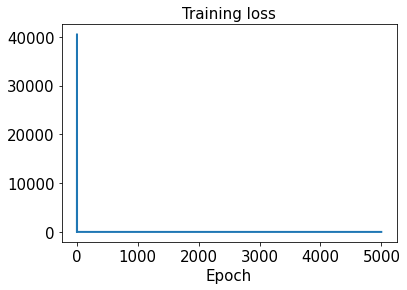

In [9]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

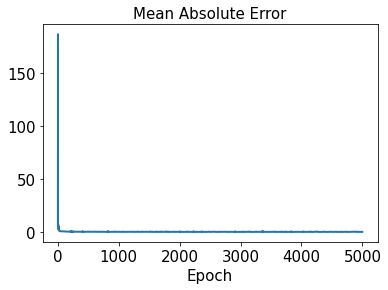

In [10]:
plt.plot(hist['mae'], lw=2)
plt.title('Mean Absolute Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [11]:
test_results = autoencoder.evaluate([x_test, tsr_test])

1/1 [==============================] - 0s 135ms/step - loss: 0.0106 - mae: 0.0000e+00 - mape: 0.0000e+00 - rmse: 0.0000e+00 - msle: 0.0000e+00


In [12]:
decoded_imgs = autoencoder.predict([x_test, tsr_test])

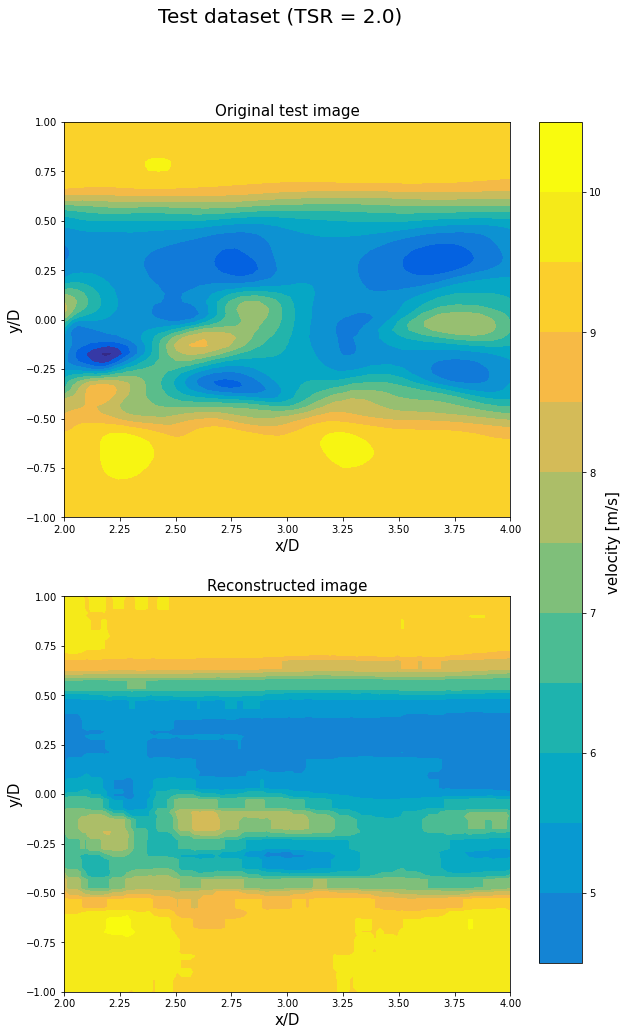

In [13]:
plt.figure(figsize=(8, 16))
xtest_rotate = x_test.T.reshape(100, 100)
decoded_rotate = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(2, 1, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, xtest_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(2, 1, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.075, 0.73])
cbar = plt.colorbar(a2, cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)
cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [14]:
error_test = np.abs(decoded_imgs - x_test) / x_test * 100
print(error_test)

[[[[0.8449313 ]
   [2.7703831 ]
   [2.752008  ]
   ...
   [0.43069553]
   [0.45814383]
   [1.7439319 ]]

  [[2.7481163 ]
   [3.4726565 ]
   [3.4508884 ]
   ...
   [0.7673373 ]
   [0.7948756 ]
   [0.4967674 ]]

  [[2.7373104 ]
   [3.457417  ]
   [3.4367447 ]
   ...
   [0.7609852 ]
   [0.7885201 ]
   [0.48831302]]

  ...

  [[4.350222  ]
   [4.0975375 ]
   [4.1506863 ]
   ...
   [0.80748135]
   [0.75816613]
   [0.5263529 ]]

  [[4.3336005 ]
   [4.07983   ]
   [4.117458  ]
   ...
   [0.8622211 ]
   [0.81284213]
   [0.57981646]]

  [[0.54268026]
   [4.4206643 ]
   [4.4706116 ]
   ...
   [1.0384241 ]
   [0.9803376 ]
   [3.1552029 ]]]]


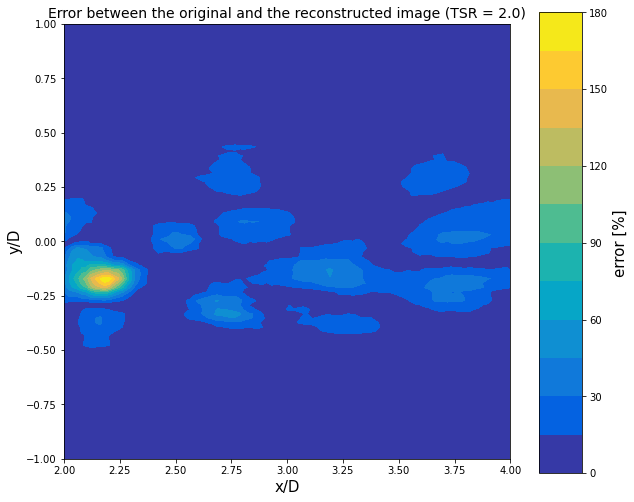

In [15]:
error_test_rotate = error_test.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 2.0)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

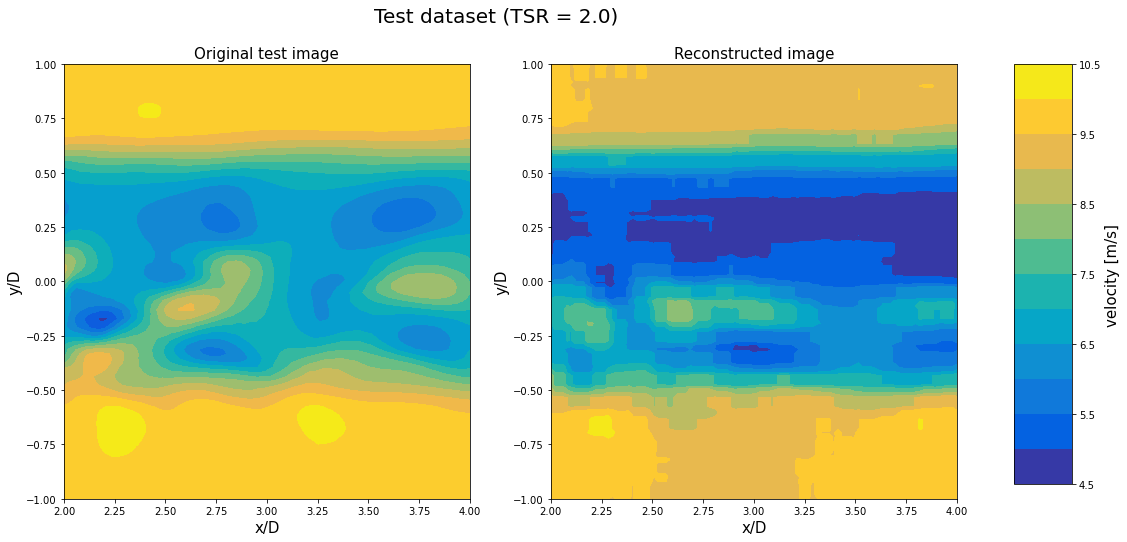

In [16]:
plt.figure(figsize=(16, 8))
xtest_rotate2 = x_test.T.reshape(100, 100)
decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, xtest_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [17]:
train0 = x_train[0].reshape(1, 100, 100, 1)
train_decode0 = autoencoder.predict([train0, tsr_train[0]]).reshape(100, 100)
print(train_decode0.shape)

(100, 100)


In [18]:
train0_orig = x_train[0].reshape(100, 100)

In [19]:
error_train0 = np.abs(train_decode0 - train0_orig) / train0_orig * 100

In [20]:
print(error_train0)

[[2.6346645  0.84615946 0.8418906  ... 0.68893594 0.65812695 1.7776551 ]
 [0.7685501  0.7377275  0.74625385 ... 1.1581417  1.1293263  0.600035  ]
 [0.84000945 0.8273106  0.8369212  ... 1.1549346  1.126121   0.5947325 ]
 ...
 [1.0274414  0.9910537  1.1182263  ... 1.0014621  0.96386725 1.0726935 ]
 [1.0777967  1.0403457  1.1555614  ... 0.9660177  0.9380998  1.0479927 ]
 [3.795274   1.2738872  1.3982166  ... 1.0899034  1.0523013  2.8826983 ]]


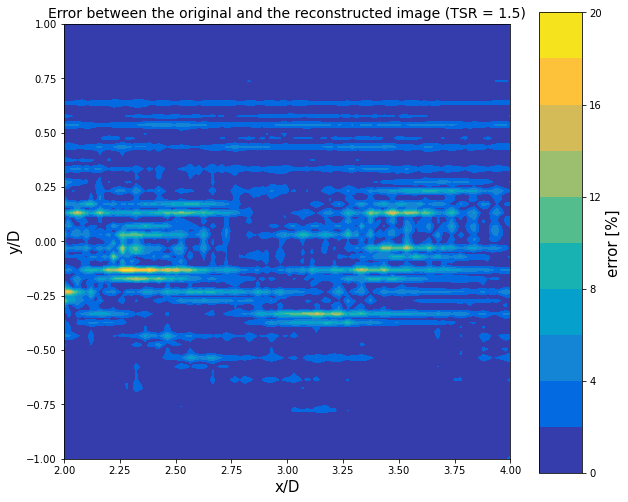

In [21]:
error_train0_rotate = error_train0.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train0_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.5)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

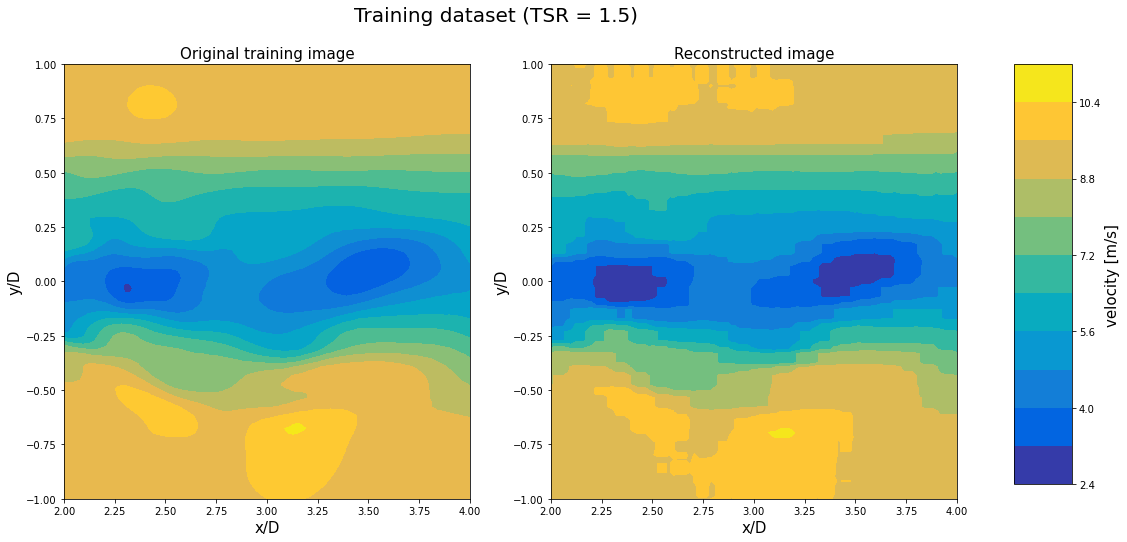

In [22]:
plt.figure(figsize=(16, 8))
#xtest_rotate2 = x_test.T.reshape(100, 100)
#decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train0_orig, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original training image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train_decode0, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Training dataset (TSR = 1.5)',fontsize=20)
plt.show()

In [23]:
print(np.mean(error_train0))

1.6657764


In [24]:
print(np.max(error_train0))

19.42174


In [25]:
print(np.mean(error_test))

7.565343


In [26]:
print(np.max(error_test))

176.41515
